## Load data

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('delaney_descriptors_with_solubility.csv')
dataset.rename({'measured log(solubility:mol/L)': 'logS'}, axis=1, inplace=True)
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0,0.000000,-2.180
1,2.37650,133.405,0,0.000000,-2.000
2,2.59380,167.850,1,0.000000,-1.740
3,2.02890,133.405,1,0.000000,-1.480
4,2.91890,187.375,1,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8,0.000000,1.144
1140,3.42130,286.114,2,0.333333,-4.925
1141,3.60960,308.333,4,0.695652,-3.893
1142,2.56214,354.815,3,0.521739,-3.790


## Model building

In [3]:
from pycaret.regression import *

In [4]:
model = setup(data=dataset, target='logS', train_size=0.8)

,Description,Value
0,Session id,2131
1,Target,logS
2,Target type,Regression
3,Original data shape,"(1144, 5)"
4,Transformed data shape,"(1144, 5)"
5,Transformed train set shape,"(915, 5)"
6,Transformed test set shape,"(229, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


## Model comparison

In [5]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5294,0.5508,0.7395,0.8720,0.2106,0.7329,0.3630
rf,Random Forest Regressor,0.5394,0.5689,0.7480,0.8673,0.2094,0.7047,0.2870
lightgbm,Light Gradient Boosting Machine,0.5621,0.5821,0.7612,0.8649,0.2153,0.7791,0.6560
xgboost,Extreme Gradient Boosting,0.5673,0.6286,0.7897,0.8545,0.2226,0.7000,0.0860
gbr,Gradient Boosting Regressor,0.5936,0.6346,0.7944,0.8529,0.2199,0.7626,0.1080
ada,AdaBoost Regressor,0.6998,0.8266,0.9066,0.8087,0.2416,0.8994,0.0870
dt,Decision Tree Regressor,0.6832,1.0059,0.9963,0.7659,0.2578,0.7961,0.0220
huber,Huber Regressor,0.7669,1.0256,1.0098,0.7627,0.2843,0.9230,0.0410
lar,Least Angle Regression,0.7711,1.0281,1.0113,0.7621,0.2852,0.9765,0.0210
br,Bayesian Ridge,0.7716,1.0279,1.0112,0.7621,0.2850,0.9774,0.0200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=2131)

**ExtraTreesRegressor** achieves a superior performance compared with the previously employed Linear Regression, so we will continue with this model.

In [6]:
et_reg = create_model('et') # 10-folds

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5932,0.6933,0.8327,0.8364,0.2540,0.9435
1,0.5668,0.6113,0.7819,0.8588,0.2326,0.4343
2,0.5120,0.5037,0.7097,0.8755,0.2171,0.4809
3,0.5079,0.5621,0.7497,0.8622,0.1638,0.3300
4,0.4462,0.3846,0.6202,0.9237,0.1732,0.2557
5,0.5201,0.5122,0.7157,0.8918,0.1966,1.0461
6,0.4798,0.4205,0.6485,0.9118,0.2051,2.3710
7,0.5414,0.6250,0.7906,0.8287,0.2358,0.7149
8,0.5496,0.6130,0.7829,0.8507,0.2352,0.4349


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Hyperparameter tuning

We will tune the hyperparameters of the model based on the Mean Absolute Error (MAE) over 50 iterations

In [7]:
tuned_et_reg = tune_model(et_reg, n_iter=50, optimize='mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6129,0.7098,0.8425,0.8325,0.2607,0.6651
1,0.5861,0.6251,0.7906,0.8556,0.2394,0.5202
2,0.6037,0.5941,0.7708,0.8531,0.2272,0.4572
3,0.5742,0.6333,0.7958,0.8448,0.1820,0.6187
4,0.4780,0.3825,0.6185,0.9241,0.1674,0.2713
5,0.5422,0.5186,0.7201,0.8904,0.1976,1.1158
6,0.5328,0.4567,0.6758,0.9042,0.2082,2.1618
7,0.5480,0.5644,0.7513,0.8453,0.2320,0.9326
8,0.6096,0.6441,0.8025,0.8431,0.2493,0.4939


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


We will continue using the original model since it was better than the tuned model

## Model analysis

### Plots

#### Residuals

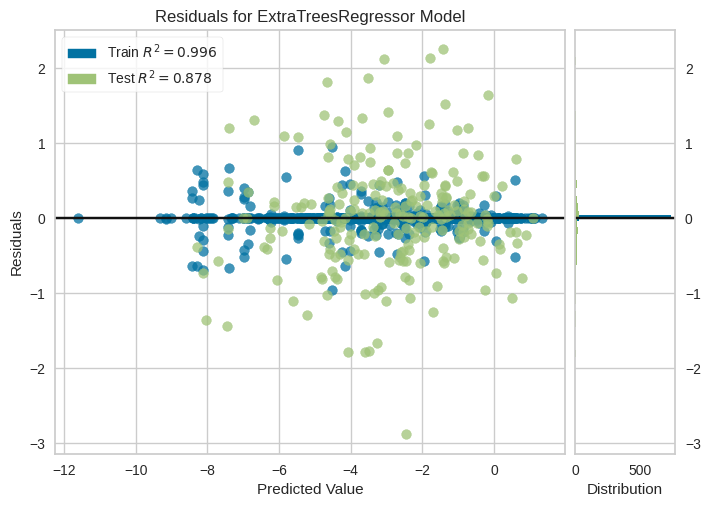

In [10]:
plot_model(et_reg, 'residuals')

#### Error

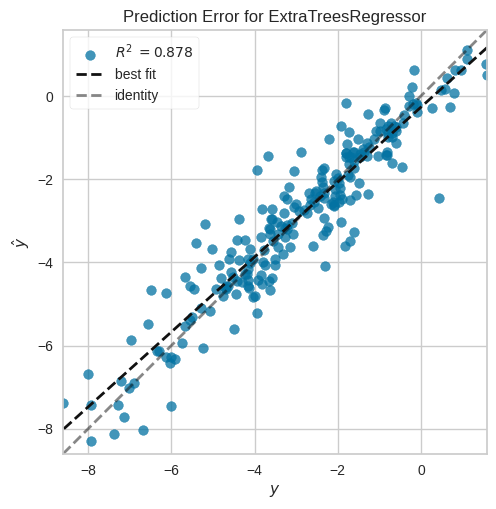

In [11]:
plot_model(et_reg, 'error')

#### Cooks distance

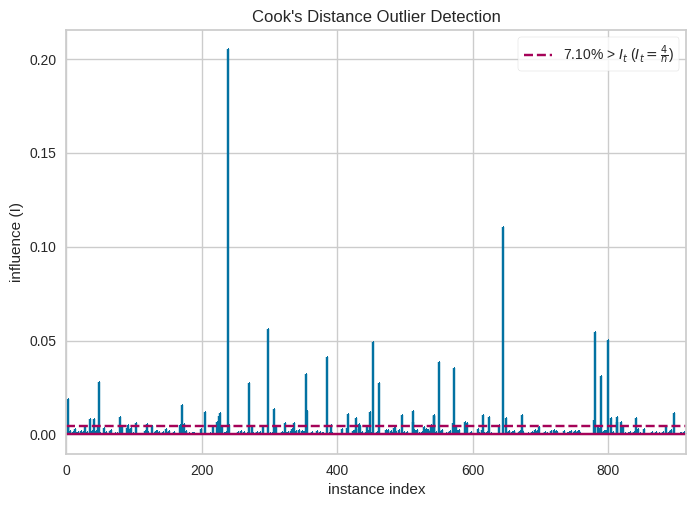

In [21]:
plot_model(et_reg, 'cooks')

#### Recursive Feature Selection

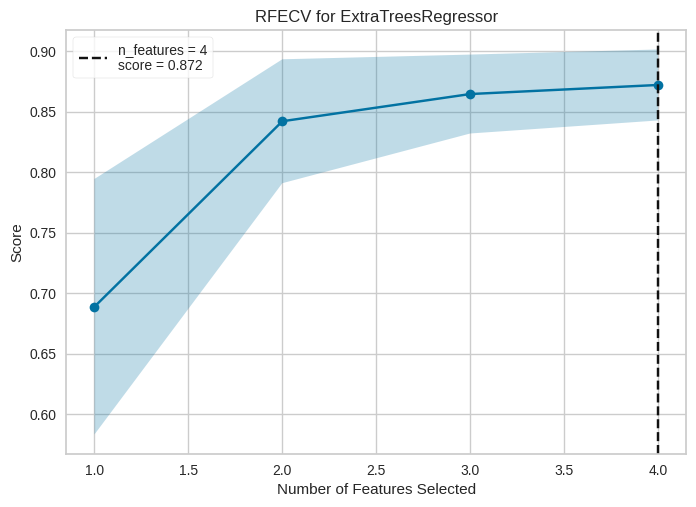

In [15]:
plot_model(et_reg, 'rfe')

#### Learning curve

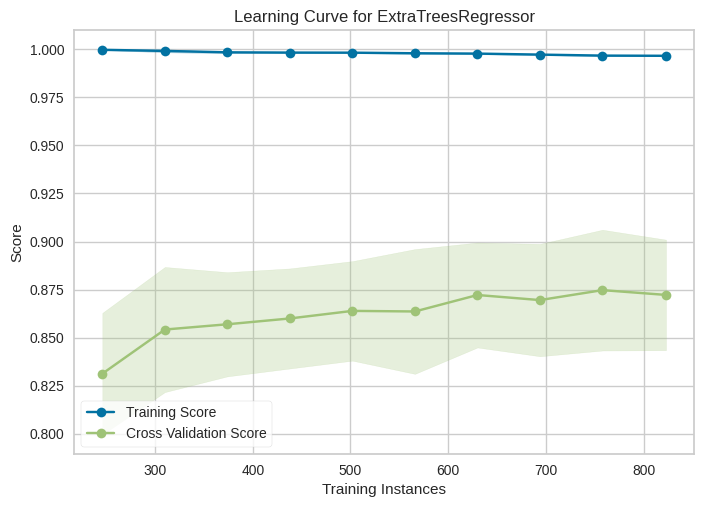

In [13]:
plot_model(et_reg, 'learning')

#### Validation curve

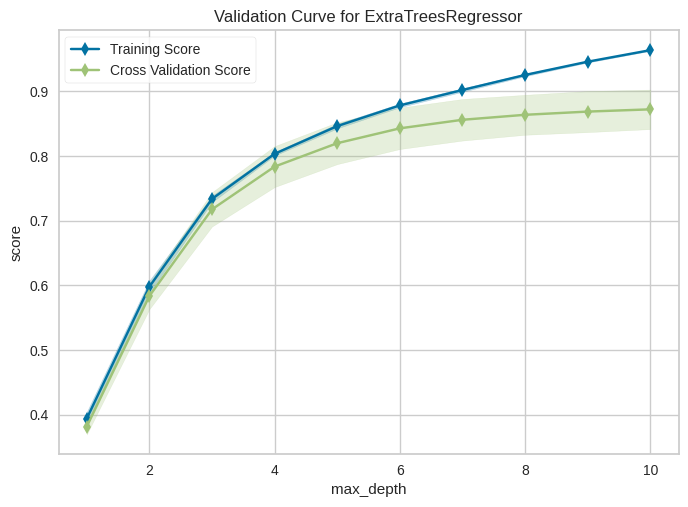

In [16]:
plot_model(et_reg, 'vc')

#### Manifold learning

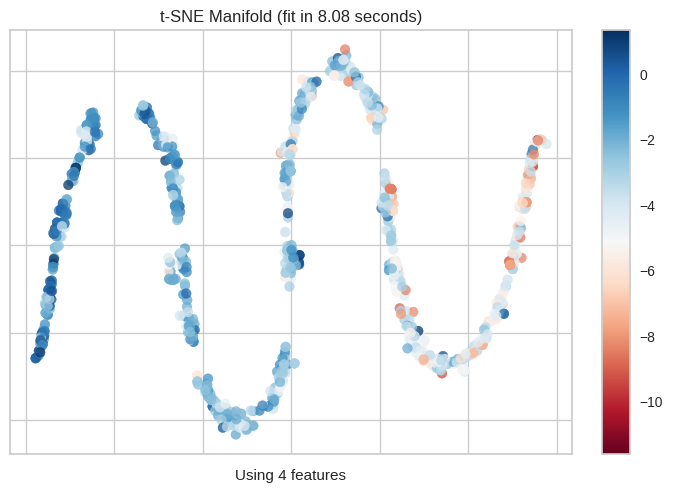

In [17]:
plot_model(et_reg, 'manifold')

#### Feature importance

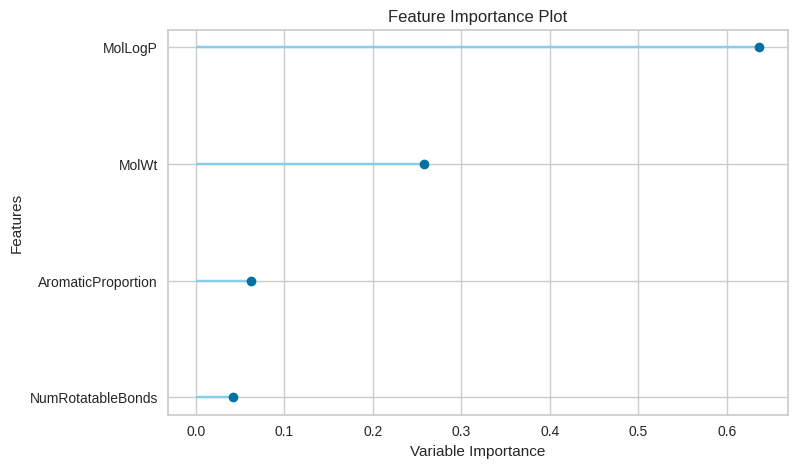

In [18]:
plot_model(et_reg, 'feature')

#### Model Hyperparameters

In [20]:
plot_model(et_reg, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


## Model Testing

In [25]:
prediction = predict_model(et_reg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5177,0.5154,0.7179,0.8780,0.2103,0.3170


Some of the predicted outputs:

In [27]:
prediction.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,prediction_label
1044,2.8296,253.304993,1,0.631579,-3.324,-3.797408
405,4.1020,182.225998,2,0.857143,-4.450,-4.750643
287,1.2314,86.134003,1,0.000000,-0.120,-0.180100
972,1.6034,153.136993,2,0.545455,-2.410,-1.960000
859,2.8398,128.173996,0,1.000000,-3.600,-2.950000
